# When UMAP taken as the dimentionality reduction method in Python

## Environment

First we shall load the necessary libraries in python

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import classification_report,roc_curve, roc_auc_score
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from umap import UMAP
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

## Data
We shall now load the data and summarise it. First the ID column will be removed and then the catogorical response variable is converted to binary

In [90]:
data= pd.read_csv('breast-cancer.csv')
data.drop('id', axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].astype('category')
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

### Splitting the data to feature and the target variables

In [91]:
# Splitting data into features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

### Splitting the data into training and test data

In [92]:
# Creating a stratified split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## Preprocessing

The recipe will be as follows:

 * diagnosis is the target
 * normalise the numeric predictors
 * experiment with dimensional reduction to 5 components
 * up-sample the minority class


In [93]:

# Identify numeric  columns
numeric_features = X.select_dtypes(include=['float64', 'int']).columns
                                       
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('umap', UMAP(n_components=5, random_state=42))  # UMAP for dimension reduction
])



# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


In [94]:
SMOTE = BorderlineSMOTE(kind='borderline-1', random_state=42)

In [95]:
# Create a complete modeling pipeline
svm_pipe5 = make_pipeline_imblearn(
    SMOTE,
    preprocessor,
    SVC(kernel='rbf', probability=True)  # Classifier
)


In [96]:
# Cross-validation and hyperparameter tuning
param_grid = {
    'svc__C': [0.1,0.25,0.50,0.75, 1, 10],  # Example range, adjust based on your needs
    'svc__gamma': ['scale', 'auto']
}

## Modeling (SVM)

This preprocessing can be used with an SVMRadial method

In [97]:
# Set up GridSearchCV
grid_search = GridSearchCV(svm_pipe5, param_grid, scoring='roc_auc', cv=10)

# Fit the model
grid_search.fit(X_train, y_train )

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Progra

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('borderlinesmote',
                                        BorderlineSMOTE(random_state=42)),
                                       ('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('umap',
                                                                                          UMAP(n_components=5, random_state=42))]),
                                                                         Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean...
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.1, 0.25, 0.5, 0.75, 1, 10],
                         'svc__gamma': ['scale', 'auto']},
             scoring='roc_auc')

## Assessment

### What does this mean for unseen data?

In [98]:
# Predictions
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

Confusion Matrix:
[[64  0]
 [10 97]]


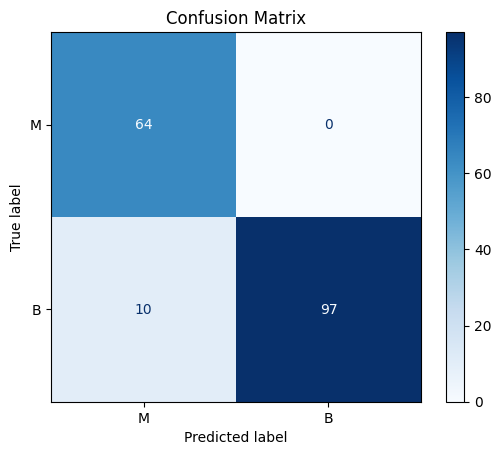

Accuracy: 0.9415
Precision: 1.0000
Recall: 0.9065
F1 Score: 0.9510
Classification Report:
              precision    recall  f1-score   support

           M       0.86      1.00      0.93        64
           B       1.00      0.91      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171

ROC AUC: 0.9476


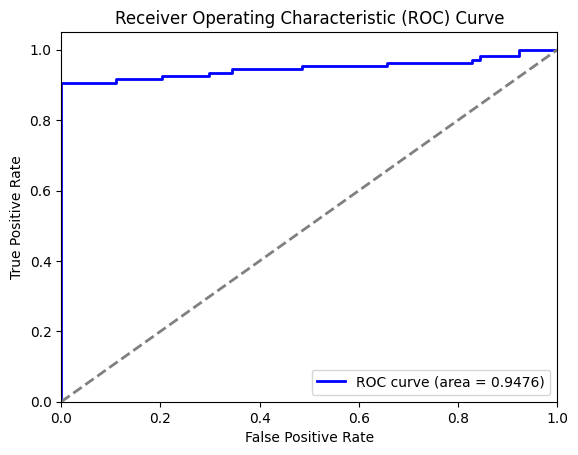

In [99]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualization of the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Extract True Positives, False Positives, True Negatives, and False Negatives
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Generate and print classification report with manually defined target names
report = classification_report(y_test, y_pred, target_names=['M', 'B'])
print("Classification Report:")
print(report)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc:.4f}')

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Repeat for 10 components

## Let's try this for num_comp = 10

In [104]:
numeric_features = X.select_dtypes(include=['float64', 'int']).columns
                                       
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('umap', UMAP( n_components=10, random_state=42))  # UMAP for dimension reduction
])



# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [106]:
SMOTE = BorderlineSMOTE(kind='borderline-1', random_state=42)

In [108]:
# Create a complete modeling pipeline
svm_pipe10 = make_pipeline_imblearn(
    SMOTE,
    preprocessor,
    SVC(kernel='rbf', probability=True)  # Classifier
)

In [109]:
# Set up GridSearchCV
grid_search = GridSearchCV(svm_pipe10, param_grid, scoring='roc_auc', cv=10)

# Fit the model
grid_search.fit(X_train, y_train)

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Progra

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('borderlinesmote',
                                        BorderlineSMOTE(random_state=42)),
                                       ('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('umap',
                                                                                          UMAP(n_components=10, random_state=42))]),
                                                                         Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mea...
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.1, 0.25, 0.5, 0.75, 1, 10],
                         'svc__gamma': ['scale', 'auto']},
             scoring='roc_auc')

Confusion Matrix:
[[64  0]
 [10 97]]


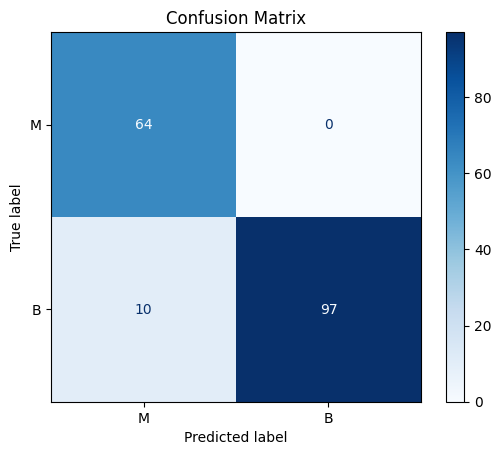

Accuracy: 0.9415
Precision: 1.0000
Recall: 0.9065
F1 Score: 0.9510
Classification Report:
              precision    recall  f1-score   support

           M       0.86      1.00      0.93        64
           B       1.00      0.91      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171

ROC AUC: 0.9755


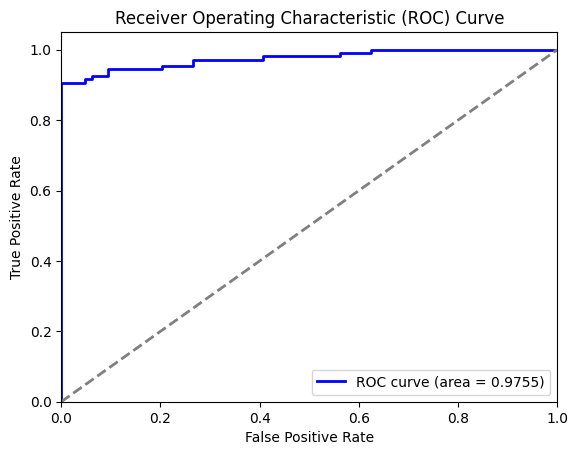

In [112]:

# Predictions
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualization of the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Extract True Positives, False Positives, True Negatives, and False Negatives
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Generate and print classification report with manually defined target names
report = classification_report(y_test, y_pred, target_names=['M', 'B'])
print("Classification Report:")
print(report)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc:.4f}')

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Repeat for 15 components

### Let's try this for num_comp = 15

In [113]:

numeric_features = X.select_dtypes(include=['float64', 'int']).columns
                                       
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('umap', UMAP(n_components=15, random_state=42))  # UMAP for dimension reduction
])



# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [114]:
# Create a complete modeling pipeline
svm_pipe15 = make_pipeline_imblearn(
    SMOTE,  # Balancing
    preprocessor,
    SVC(kernel='rbf', probability=True)  # Classifier
)

In [115]:
# Set up GridSearchCV
grid_search = GridSearchCV(svm_pipe15, param_grid, scoring='roc_auc', cv=10)

# Fit the model
grid_search.fit(X_train, y_train)

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Progra

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('borderlinesmote',
                                        BorderlineSMOTE(random_state=42)),
                                       ('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('umap',
                                                                                          UMAP(n_components=15, random_state=42))]),
                                                                         Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mea...
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.1, 0.25, 0.5, 0.75, 1, 10],
                         'svc__gamma': ['scale', 'auto']},
             scoring='roc_auc')

Confusion Matrix:
[[64  0]
 [10 97]]


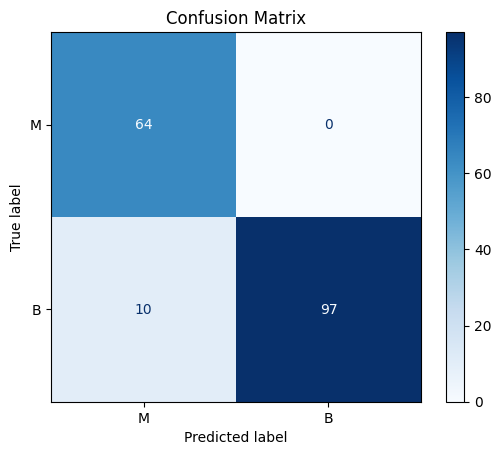

Accuracy: 0.9415
Precision: 1.0000
Recall: 0.9065
F1 Score: 0.9510
Classification Report:
              precision    recall  f1-score   support

           M       0.86      1.00      0.93        64
           B       1.00      0.91      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171

ROC AUC: 0.9696


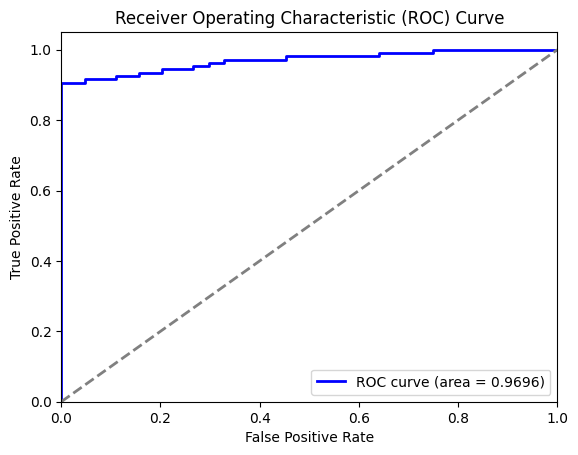

In [116]:

# Predictions
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualization of the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Extract True Positives, False Positives, True Negatives, and False Negatives
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Generate and print classification report with manually defined target names
report = classification_report(y_test, y_pred, target_names=['M', 'B'])
print("Classification Report:")
print(report)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc:.4f}')

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### Conclusion

## Using 10 UMAP components seems optimal but the difference is minor. The expected accuracy is approximately 94.15% based upon the test data.

In [118]:
# Set up GridSearchCV
grid_search = GridSearchCV(svm_pipe10, param_grid, scoring='roc_auc', cv=10)

# Fit the model
grid_search.fit(X_train, y_train)

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\udith\AppData\Local\Progra

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('borderlinesmote',
                                        BorderlineSMOTE(random_state=42)),
                                       ('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('umap',
                                                                                          UMAP(n_components=10, random_state=42))]),
                                                                         Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mea...
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object'))])),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.1, 0.25, 0.5, 0.75, 1, 10],
                         'svc__gamma': ['scale', 'auto']},
             scoring='roc_auc')

In [122]:
# Predictions
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

Confusion Matrix:
[[64  0]
 [10 97]]


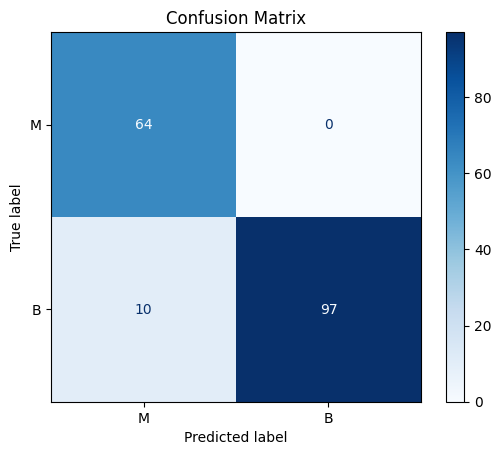

Accuracy: 0.9415
Precision: 1.0000
Recall: 0.9065
F1 Score: 0.9510
Classification Report:
              precision    recall  f1-score   support

           M       0.86      1.00      0.93        64
           B       1.00      0.91      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171

ROC AUC: 0.9755


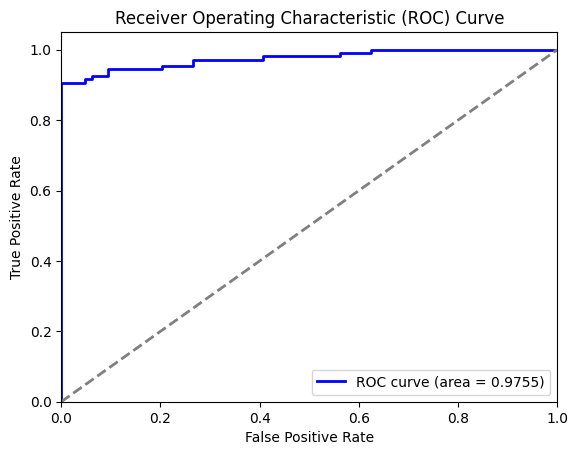

In [123]:

# Predictions
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualization of the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Extract True Positives, False Positives, True Negatives, and False Negatives
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

# Generate and print classification report with manually defined target names
report = classification_report(y_test, y_pred, target_names=['M', 'B'])
print("Classification Report:")
print(report)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc:.4f}')

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


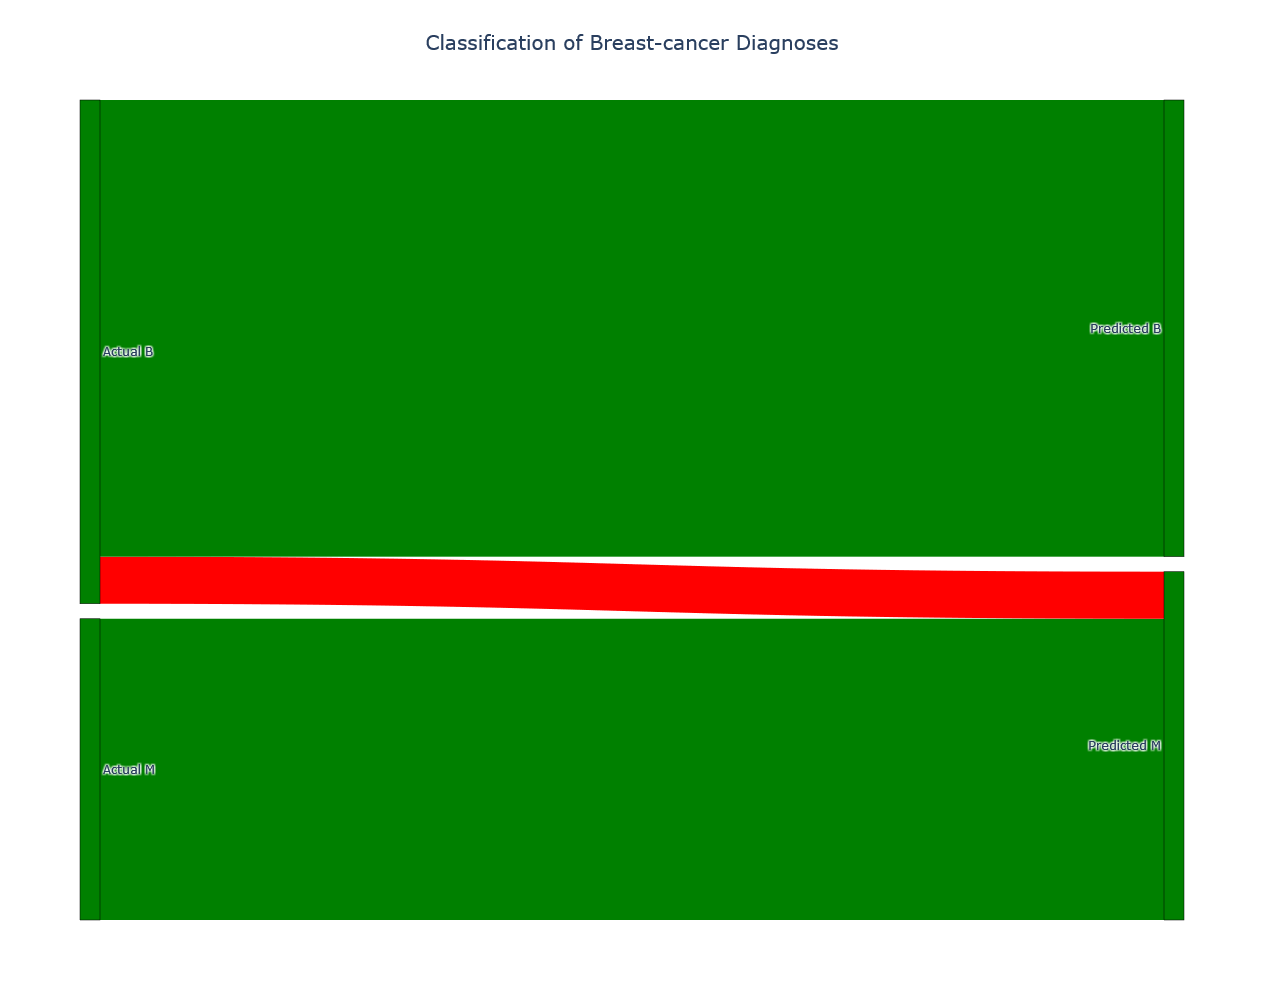

In [124]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['B', 'M'], columns=['B', 'M'])

# Create a DataFrame 
data = cm_df.reset_index().melt(id_vars='index')
data.columns = ['Reference', 'Prediction', 'Freq']
data['Misclassified'] = data['Prediction'] != data['Reference']

# Define the color map for links based on misclassification
color_map = {
    False: 'green',  # Green for correctly classified
    True: 'red'   # Red for misclassified
}

# Construct source, target, value, and color arrays for the Sankey diagram
source = []
target = []
value = []
link_colors = []

# Mapping indices for nodes
index_map = {'B': 1, 'M': 0, 'Predicted B': 3, 'Predicted M': 2}

for i, row in data.iterrows():
    source.append(index_map[row['Reference']])
    target.append(index_map['Predicted ' + row['Prediction']])
    value.append(row['Freq'])
    link_colors.append(color_map[row['Misclassified']])

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["Actual B", "Actual M", "Predicted B", "Predicted M"],
        color=["green", "green", "green", "green"]
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors  
    )
)])

fig.update_layout(
    title_text="Classification of Breast-cancer Diagnoses",
    title_font_size=20,
    title_x=0.5,  
    font_size=12,
    width=600,  
    height=1000   
)

fig.show()
